In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import uniform
import itertools

In [3]:
import pickle
import pandas as pd

In [4]:
from utils import rayleigh_function, get_surface_data

In [5]:
from astropy.io import ascii

In [49]:
plt.rc('text', usetex=True)
plt.rc('font', size=14)
plt.rc('legend', fontsize=13)

## Basic stuff

In [6]:
# the wavelengths
X = np.linspace(0.41, 2.35, 10000)

In [7]:
sun_transmission = get_surface_data(["data/cold_sun.csv"], X)[0]

In [8]:
# get earth transmission to surface 
earth_transmission_path = "data/Earth_Sun0.875_Surface"
wavelength, albedo = np.genfromtxt(earth_transmission_path, dtype=None, unpack=True)

earth_interp = interp1d(wavelength, albedo)
earth_transmission = earth_interp(X)*sun_transmission

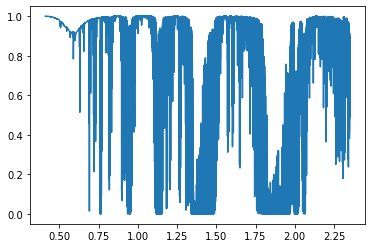

In [9]:
plt.plot(X, earth_interp(X))

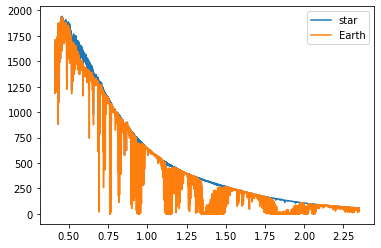

In [10]:
plt.plot(X, sun_transmission, label="star")
plt.plot(X, earth_transmission, label='Earth')
plt.legend()

## 6km cloud

0.4398400232288037


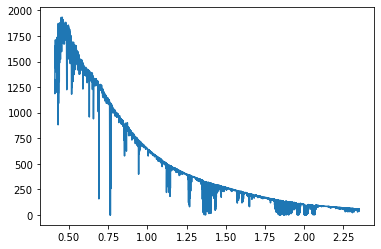

In [11]:
# get pressure at 6km
atmosphere_data_path = "data/clima_ColdEarth_Sun0.875"
atmosphere_data = ascii.read(atmosphere_data_path)
pressure_interp = interp1d(atmosphere_data['ALT'], atmosphere_data['P'])
pressure_6km = pressure_interp(6)
print(pressure_6km)

# get 6km cloud albedo
path_6km = "data/Earth_Sun0.875_6kmCloud"
wavelength, albedo = np.genfromtxt(path_6km, dtype=None, unpack=True)
interp_6km = interp1d(wavelength, albedo)
albedo_6km = interp_6km(X)
transmission_6km = sun_transmission*albedo_6km
plt.plot(X, transmission_6km)

## Surface & Combinations

In [13]:
cloud_path = "data/cloud/cloud_all.csv"
snow_path = "data/melting_snow_1-16.9366.asc"
sand_path = "data/quartz_gds74.5830.asc"
seawater_path = "data/seawater_open_ocean_sw2.9627.asc"
basalt_path = "data/basalt_weathered_br93-43.7492.asc"
veg_path = "data/Agrococcus_KM349956.csv"

surface_paths = {"snow": snow_path, 
                 "sand": sand_path,
                 "seawater": seawater_path,
                 "basalt": basalt_path,
                 "veg": veg_path}
cloud_path = [cloud_path]

surface_data = get_surface_data(surface_paths.values(), X)
cloud_data = get_surface_data(cloud_path, X)

# 100% veg (snow) + earthlike veg (snow)

In [19]:
nice_surface_names = ['Snow', 'Sand', 'Seawater', 'Basalt', 'Aspen Leaf']

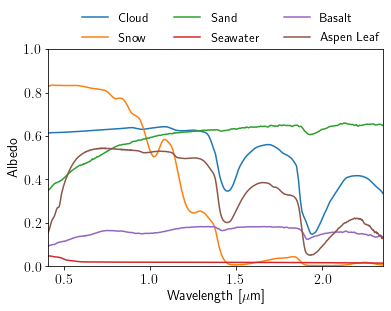

In [111]:
plt.plot(X, cloud_data.T, label='Cloud')

for i, surface_name in enumerate(surface_paths.keys()):
    plt.plot(X, surface_data[i,:], label=nice_surface_names[i])

plt.ylim([0,1])
plt.xlim([0.41, 2.35])
plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel('Albedo')
plt.legend(frameon=False, ncol=3, bbox_to_anchor=(0.065, 0.97))
plt.savefig('plots/components_albedo.pdf', bbox_inches='tight')

In [97]:
# # NOTE: uncomment this section to generate all possible combinations
# # of surfaces. This takes a little time to run. Should only ever need
# # to run once.

# # how many steps for each component
# composition_steps = np.arange(0, 105, 5)
# # create all possible combinations (note: can be greater than 100 here)
# surface_combinations_iter = itertools.product(composition_steps, repeat=6)
# # convert to numpy array
# surface_combinations = np.array(list(surface_combinations_iter))
# # get combinations that sums to 100, and renormalize to 1
# # this is what we want
# unity_surface_combinations = surface_combinations[np.where(np.sum(surface_combinations, axis = 1) == 100)[0]]/100

# # component names
# component_names = ['cloud'] + list( surface_paths.keys() )

# # save data so we don't have to do this again
# pickle.dump([component_names, unity_surface_combinations], open("output/surface_combinations.pkl", "wb"))

In [98]:
unity_surface_combinations

array([[0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.05, 0.95],
       [0.  , 0.  , 0.  , 0.  , 0.1 , 0.9 ],
       ...,
       [0.95, 0.  , 0.05, 0.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [15]:
# load all component combinations that sum to unity
component_names, unity_surface_combinations = pickle.load(open("output/surface_combinations.pkl", "rb"))

In [16]:
all_spectra = pickle.load(open("output/all_spectra.pkl", "rb"))

In [ ]:
# all_spectra = make_all_spectra(X, combinations = unity_surface_combinations, 
#                                cloud_index = component_names.index("cloud"),
#                                surfaces_albedo = surface_data, cloud_albedo = cloud_data,
#                                transmission_surface = earth_transmission,
#                                transmission_6km = transmission_6km,
#                                p_6km = pressure_6km,
#                                star_spectrum = sun_transmission)

# # save spectra data
# pickle.dump(all_spectra, open("output/all_spectra.pkl", "wb"))

In [17]:
unity_surface_combinations_df = pd.DataFrame(unity_surface_combinations, 
                                             columns=component_names)

In [18]:
unity_surface_combinations_df

,cloud,snow,sand,seawater,basalt,veg
0,0.00,0.00,0.00,0.00,0.00,1.00
1,0.00,0.00,0.00,0.00,0.05,0.95
2,0.00,0.00,0.00,0.00,0.10,0.90
3,0.00,0.00,0.00,0.00,0.15,0.85
4,0.00,0.00,0.00,0.00,0.20,0.80
...,...,...,...,...,...,...
53125,0.95,0.00,0.00,0.00,0.05,0.00
53126,0.95,0.00,0.00,0.05,0.00,0.00
53127,0.95,0.00,0.05,0.00,0.00,0.00
53128,0.95,0.05,0.00,0.00,0.00,0.00


## Make fake filters

In [32]:
FILTER_SIZE = 0.2 # in micron
FILTER_MIN  = 0.45 # starting wavelength
FILTER_MAX  = 2.35 # final wavelength

In [33]:
N_FILTERS = int(np.floor((FILTER_MAX - FILTER_MIN)/FILTER_SIZE))

In [41]:
filter_names = [f"f{i}" for i in range(N_FILTERS)]

In [43]:
nice_filter_names = []
for i, _ in enumerate(filter_names):
    nice_filter_names.append(r"$f_" + str(i+1) + "$")

In [34]:
def filter_func(initial, x, step=FILTER_SIZE):
    output = np.zeros(len(x))
    inrange = (x >= initial) & (x < initial + step)
    
    output[inrange] = 1
    output[~inrange] = 0
    return output

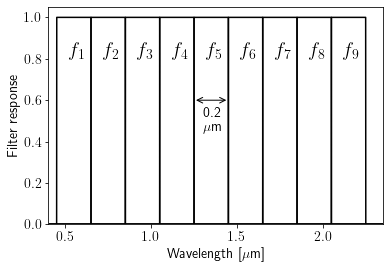

In [109]:
for i in range(N_FILTERS):
    filter_pos = FILTER_MIN + FILTER_SIZE*(i)
    filter_response = filter_func(filter_pos, X, step=FILTER_SIZE)
    plt.plot(X, filter_response, c='k',)
for i, filter_name in enumerate(nice_filter_names):
    plt.annotate(filter_name, xy=(0.52 + 0.2*i, 0.8), fontsize='x-large')

plt.annotate(s='', xy=(0.45 + 0.2*4, 0.6), xytext=(0.45 + 0.2*5,0.6), arrowprops=dict(arrowstyle='<->'))
plt.annotate('0.2 \n $\mu$m',xy=(1.3, 0.45))
plt.ylim([0,1.05])
plt.xlim([0.4, 2.35])
plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel(r'Filter response')
plt.savefig('plots/filters_response.pdf')

In [23]:
colors = np.zeros((N_FILTERS, len(all_spectra)))

for i in range(N_FILTERS):
    filter_pos = FILTER_MIN + FILTER_SIZE*(i)
    filter_response = filter_func(filter_pos, X, step=FILTER_SIZE) * all_spectra
    print(f"f{i+1}",filter_pos)
    colors[i] = np.trapz(filter_response, x=X, axis=1)

f1 0.45
f2 0.65
f3 0.8500000000000001
f4 1.05
f5 1.25
f6 1.45
f7 1.6500000000000001
f8 1.85
f9 2.0500000000000003


In [24]:
colors = colors.transpose()

In [26]:
filter_info = {f"f{i}":FILTER_MIN + FILTER_SIZE*(i) for i in range(N_FILTERS)}

# save filters data
pickle.dump(filter_info, open("output/filters_f1.pkl", "wb"))

In [102]:
# save colors data
pickle.dump((filter_names, colors), open("output/colors_f1.pkl", "wb"))

In [89]:
unity_surface_combinations_df[(unity_surface_combinations_df['seawater'] > 0)]

,cloud,snow,sand,seawater,basalt,veg
21,0.00,0.00,0.00,0.05,0.00,0.95
22,0.00,0.00,0.00,0.05,0.05,0.90
23,0.00,0.00,0.00,0.05,0.10,0.85
24,0.00,0.00,0.00,0.05,0.15,0.80
25,0.00,0.00,0.00,0.05,0.20,0.75
...,...,...,...,...,...,...
53113,0.90,0.00,0.00,0.05,0.05,0.00
53114,0.90,0.00,0.00,0.10,0.00,0.00
53117,0.90,0.00,0.05,0.05,0.00,0.00
53121,0.90,0.05,0.00,0.05,0.00,0.00


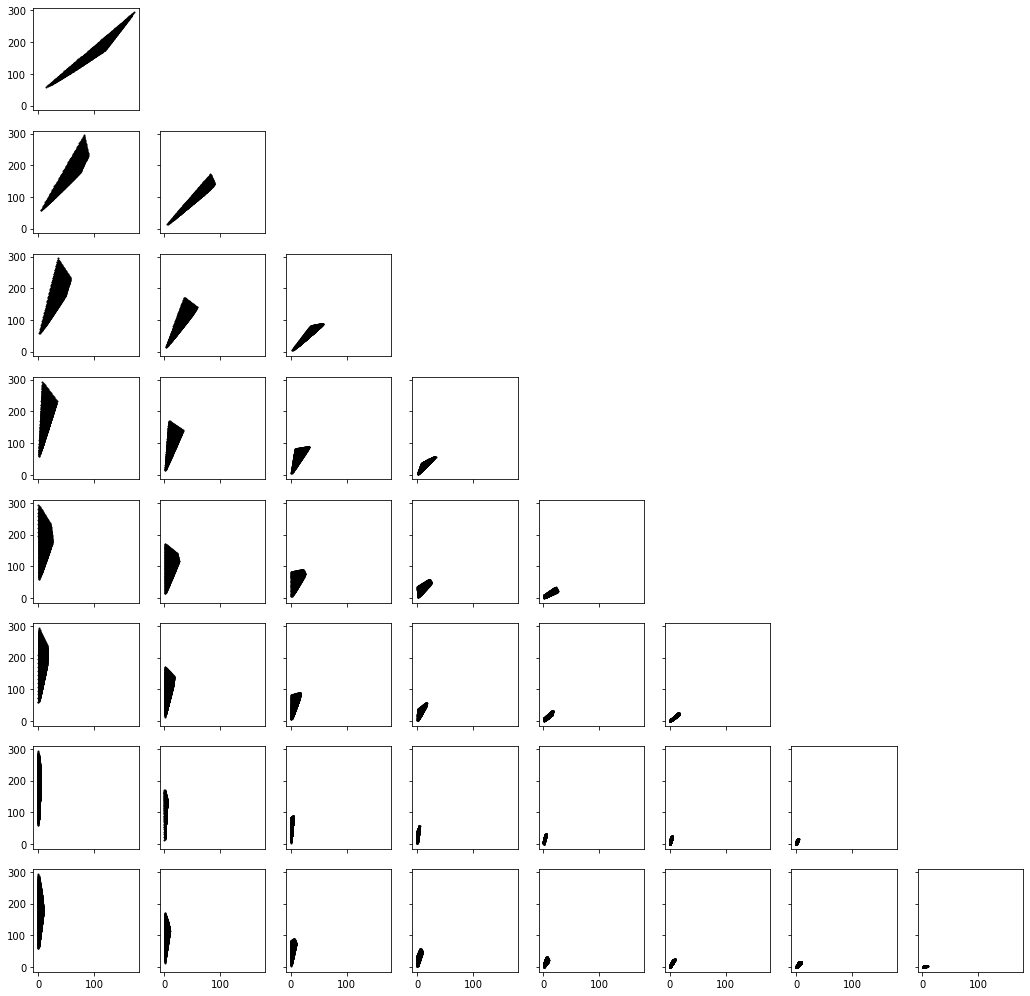

In [96]:
has_water = colors[(unity_surface_combinations_df['seawater'] > 0)]
fig, axes = plt.subplots(nrows=N_FILTERS, ncols=N_FILTERS, figsize=(20, 20), sharey=True, sharex=True)
for i in range(N_FILTERS):
    for j in range(N_FILTERS):
        if i > j:
            axes[i,j].scatter(has_water[:,i], has_water[:,j], s=1, c='k')
#         elif i == j:
#             axes[i,j].hist(has_water[:,i], bins=100)
        else:
            axes[i,j].remove()